<a href="https://colab.research.google.com/github/pratyushrastogi98/Sem7/blob/main/Economic_Load_Dispatch_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd sample_data
!ls

/content/sample_data
anscombe.json		      DatasetELD.csv	     README.md
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


In [ ]:
# directories
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

#Loading the Economic Load Dispatch dataset


This section will load the training and test dataset.
We will split the output data into three ssets for each generator

In [ ]:
training_data = pd.read_csv('DatasetELD.csv')
print('Training data loaded...')

Training data loaded...


In [ ]:
training_data.head()

,Pdemand (MW),G1 (MW),G2 (MW),G3 (MW),lambda ($/MWh)
0,150,35.0907,64.1317,52.4767,7.678935
1,100,18.3410,49.2796,33.2038,7.352249
2,126,24.0209,60.2408,41.7382,7.384335
3,119,21.7120,58.1885,39.0995,7.347393
4,227,80.7580,80.0000,70.0000,8.594755


In [ ]:
training_data.describe()

,Pdemand (MW),G1 (MW),G2 (MW),G3 (MW),lambda ($/MWh)
count,40.000000,40.000000,40.000000,40.000000,4.000000e+01
mean,131.950000,34.542727,55.708375,43.140727,2.500074e+05
std,67.769197,25.159262,22.321564,23.474232,1.581138e+06
min,30.000000,10.000000,10.062800,10.000000,6.511007e+00
25%,70.500000,10.000000,39.914450,21.050025,7.138848e+00
50%,126.000000,25.529000,59.214650,42.473100,7.469140e+00
75%,192.500000,49.511650,76.929375,68.790175,7.964118e+00
max,235.000000,85.000000,80.000000,70.000000,1.000000e+07


In [ ]:
# convert data as a numpy array
training_data = training_data.to_numpy()

In [ ]:
type(training_data)

numpy.ndarray

In [ ]:
# divide into input labels and output data
X_train = training_data[0:30,0]
X_train = X_train.reshape(X_train.shape[0], 1)
Y_train = training_data[0:30,1:4]
print(X_train.shape, Y_train.shape)

(30, 1) (30, 3)


In [ ]:
# divide into input labels and output data
X_test = training_data[30:,0]
X_test = X_test.reshape(X_test.shape[0], 1)
Y_test = training_data[30:,1:4]
print(X_test.shape, Y_test.shape)

(10, 1) (10, 3)


In [ ]:
G1 = Y_train[:,0];
G1.reshape(30,1);
G2 = Y_train[:,1];
G2.reshape(30,1);
G3 = Y_train[:,2];
G3.reshape(30,1);

In [ ]:
X_train[6]

array([56.])

In [ ]:
Y_train[6]

array([10.    , 33.5358, 12.7716])

In [ ]:
G3[6]

12.7716

#Building ANN Model
Here, we will build an ANN model that can optimise the load dispatch problem

In [ ]:
# import libraries
from keras import datasets, models, layers

In [ ]:
X_train

array([[150.],
       [100.],
       [126.],
       [119.],
       [227.],
       [ 81.],
       [ 56.],
       [114.],
       [161.],
       [ 64.],
       [139.],
       [198.],
       [110.],
       [173.],
       [ 35.],
       [213.],
       [215.],
       [170.],
       [221.],
       [230.],
       [197.],
       [ 53.],
       [103.],
       [ 71.],
       [190.],
       [ 69.],
       [ 38.],
       [ 30.],
       [188.],
       [223.]])

In [ ]:
from tensorflow.keras import datasets, layers, models
ANN1 = models.Sequential()
# add layer 1 - Fully Connected Layer
ANN1.add(layers.Dense(400, activation = 'relu', input_dim = 1))
# add layer 2 - Fully Connected Layer
ANN1.add(layers.Dense(400, activation = 'relu'))
# add layer 3 - Fully Connected Layer
ANN1.add(layers.Dense(400, activation = 'relu'))
# add layer 4 - Fully Connected Layer
ANN1.add(layers.Dense(400, activation = 'relu'))
# add layer 5 - Fully Connected Layer
ANN1.add(layers.Dense(400, activation = 'relu'))
# add layer 6 - Fully Connected Layer
ANN1.add(layers.Dense(400, activation = 'relu'))
# Output Layer
ANN1.add(layers.Dense(1))
ANN1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_3 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_4 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_5 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4

In [ ]:
from tensorflow.keras import datasets, layers, models
ANN2 = models.Sequential()
# add layer 1 - Fully Connected Layer
ANN2.add(layers.Dense(400, activation = 'relu', input_dim = 1))
# add layer 2 - Fully Connected Layer
ANN2.add(layers.Dense(400, activation = 'relu'))
# add layer 3 - Fully Connected Layer
ANN2.add(layers.Dense(400, activation = 'relu'))
# add layer 4 - Fully Connected Layer
ANN2.add(layers.Dense(400, activation = 'relu'))
# add layer 5 - Fully Connected Layer
ANN2.add(layers.Dense(400, activation = 'relu'))
# add layer 6 - Fully Connected Layer
ANN2.add(layers.Dense(400, activation = 'relu'))
# Output Layer
ANN2.add(layers.Dense(1))
ANN2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 400)               800       
_________________________________________________________________
dense_8 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_9 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_10 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_11 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_12 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [ ]:
from tensorflow.keras import datasets, layers, models
ANN3 = models.Sequential()
# add layer 1 - Fully Connected Layer
ANN3.add(layers.Dense(400, activation = 'relu', input_dim = 1))
# add layer 2 - Fully Connected Layer
ANN3.add(layers.Dense(400, activation = 'relu'))
# add layer 3 - Fully Connected Layer
ANN3.add(layers.Dense(400, activation = 'relu'))
# add layer 4 - Fully Connected Layer
ANN3.add(layers.Dense(400, activation = 'relu'))
# add layer 5 - Fully Connected Layer
ANN3.add(layers.Dense(400, activation = 'relu'))
# add layer 6 - Fully Connected Layer
ANN3.add(layers.Dense(400, activation = 'relu'))
# Output Layer
ANN3.add(layers.Dense(1))
ANN3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 400)               800       
_________________________________________________________________
dense_15 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_16 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_17 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_18 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_19 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [ ]:
# Compile the models
ANN1.compile(optimizer='Adam', loss='mean_squared_error')
ANN2.compile(optimizer='Adam', loss='mean_squared_error')
ANN3.compile(optimizer='Adam', loss='mean_squared_error')

# Train the model
In this section we will train our model on X_train


In [ ]:
history1 = ANN1.fit(X_train, G1, epochs = 5000, shuffle=True, verbose=0)

In [ ]:
history2 = ANN2.fit(X_train, G2, epochs = 5000, shuffle=True, verbose = 0)

In [ ]:
history3 = ANN3.fit(X_train, G3, epochs = 5000, shuffle=True, verbose =0)

#Evaluating the model
In this section, we will plot the training accuracy with epochs and also calculate, confusion matrix

In [ ]:
test_score = ANN1.evaluate(X_test, Y_test[:,0]) # Test Accuracy
test_score = ANN2.evaluate(X_test, Y_test[:,1]) # Test Accuracy
test_score = ANN3.evaluate(X_test, Y_test[:,2]) # Test Accuracy

1/1 [==============================] - 0s 1ms/step - loss: 0.8763


In [ ]:
history3.history.keys()

dict_keys(['loss'])

In [ ]:
loss = history3.history['loss']

In [ ]:
epochs = range(len(loss))

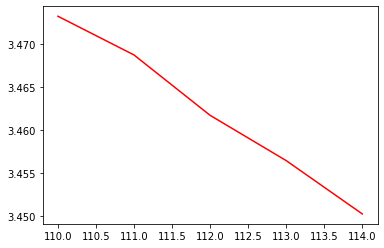

In [ ]:
plt.plot(epochs[110:115], loss[110:115], 'r-')

In [ ]:
Y_test

array([[11.3387, 43.0745, 25.1511],
       [48.9084, 76.3938, 68.3869],
       [27.0371, 56.9889, 43.208 ],
       [38.1174, 66.8169, 55.9609],
       [10.    , 22.1516, 10.    ],
       [14.6707, 46.0269, 28.9826],
       [71.4492, 80.    , 70.    ],
       [10.    , 11.0677, 10.    ],
       [10.    , 24.1729, 10.    ],
       [85.    , 80.    , 70.    ]])

In [ ]:
G1_load = ANN1.predict(X_test)
G1_load.reshape(10,1);
G2_load = ANN2.predict(X_test)
G2_load.reshape(10,1);
G3_load = ANN3.predict(X_test)
G3_load.reshape(10,1);

In [ ]:
print(G1_load[1], G2_load[1], G3_load[1])

[49.050636] [76.2912] [68.13999]


In [ ]:
sum = 0;
for i in range(10):
  err=(G1_load[i]-Y_test[i,0])/Y_test[i,0];
  j = err*err;
  sum = sum+j;
  print(j);

[0.00680699]
[8.457554e-06]
[0.00672561]
[6.1922788e-06]
[0.0001522]
[0.00996888]
[1.1356551e-06]
[1.2947137e-07]
[0.00018535]
[0.00087699]


In [ ]:
sum

array([0.02473193], dtype=float32)

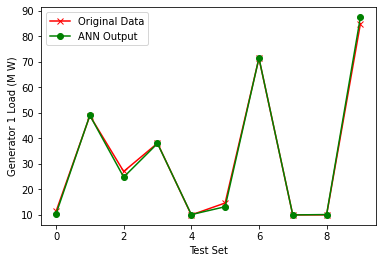

In [ ]:
plt.plot(Y_test[:,0],'rx-')
plt.plot(G1_load,'go-')
plt.xlabel('Test Set')
plt.ylabel('Generator 1 Load (M W)')
plt.legend(["Original Data", "ANN Output"], loc ="upper left")

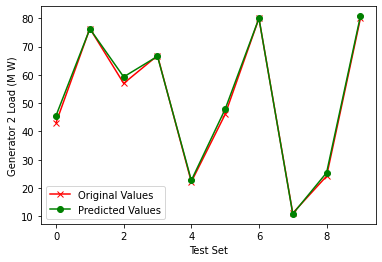

In [ ]:
plt.plot(Y_test[:,1],'rx-')
plt.plot(G2_load,'go-')
plt.xlabel('Test Set')
plt.ylabel('Generator 2 Load (M W)')
plt.legend(["Original Values", "Predicted Values"], loc ="lower left")

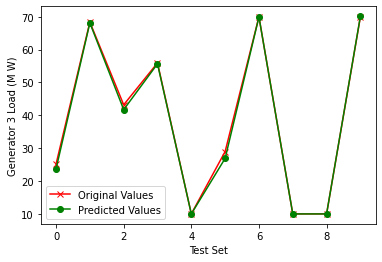

In [ ]:
plt.plot(Y_test[:,2],'rx-')
plt.plot(G3_load,'go-')
plt.xlabel('Test Set')
plt.ylabel('Generator 3 Load (M W)')
plt.legend(["Original Values", "Predicted Values"], loc ="lower left")

Text(0, 0.5, 'Generator 1 Load (M W)')

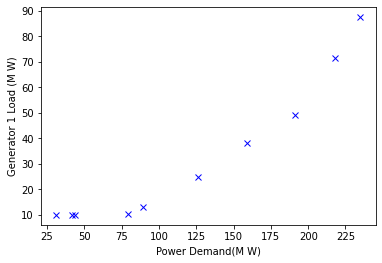

In [ ]:
plt.plot(X_test,G1_load,'bx')
plt.xlabel('Power Demand(M W)')
plt.ylabel('Generator 1 Load (M W)')

Text(0, 0.5, 'Generator 2 Load (M W)')

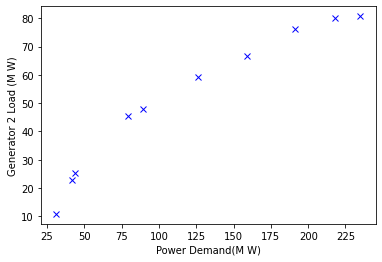

In [ ]:
plt.plot(X_test,G2_load,'bx')
plt.xlabel('Power Demand(M W)')
plt.ylabel('Generator 2 Load (M W)')

Text(0, 0.5, 'Generator 3 Load (M W)')

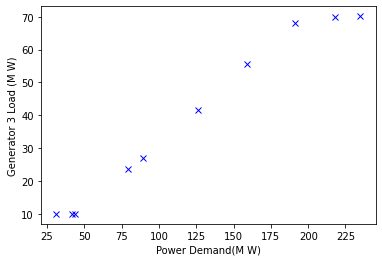

In [ ]:
plt.plot(X_test,G3_load,'bx')
plt.xlabel('Power Demand(M W)')
plt.ylabel('Generator 3 Load (M W)')